# Introduction to Chat Bot..

## Question and answer chat bot

# Loading the data

In [1]:
import pickle
import numpy as np

In [2]:
with open('train_qa.txt' , 'rb') as f:
    train_data = pickle.load(f)

In [3]:
with open('test_qa.txt' , 'rb') as f:
    test_data = pickle.load(f)

# exploring the format of the data

In [4]:
type(train_data)

list

In [5]:
type(test_data)

list

In [6]:
len(train_data)

10000

In [7]:
len(test_data)

1000

In [8]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [9]:
train_data[0][1]

['Is', 'Sandra', 'in', 'the', 'hallway', '?']

In [10]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [11]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

# setting up the vocabulary of all words

In [12]:
vocab = set()

In [13]:
all_data = train_data + test_data

In [14]:
for story , question , answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [15]:
vocab.add('no')
vocab.add('yes')

In [16]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [17]:
vocab_len = len(vocab) + 1

In [18]:
max_story_len = max([len(data[0]) for data in all_data])

In [19]:
max_story_len

156

In [20]:
max_question_len = max([len(data[1]) for data in all_data])

In [21]:
max_question_len

6

# vectorizing the data

In [22]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [23]:
vocab_size = len(vocab) + 1

In [24]:
import tensorflow as tf

In [25]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [26]:
tokenizer = Tokenizer(filters= [])

In [27]:
tokenizer.fit_on_texts(vocab)

In [28]:
tokenizer.word_index

{'up': 1,
 'there': 2,
 'discarded': 3,
 'sandra': 4,
 'back': 5,
 'milk': 6,
 'yes': 7,
 'apple': 8,
 'john': 9,
 'got': 10,
 'put': 11,
 'garden': 12,
 'left': 13,
 'journeyed': 14,
 '?': 15,
 'no': 16,
 'moved': 17,
 'dropped': 18,
 'to': 19,
 'daniel': 20,
 'bathroom': 21,
 'office': 22,
 '.': 23,
 'is': 24,
 'travelled': 25,
 'in': 26,
 'the': 27,
 'went': 28,
 'bedroom': 29,
 'took': 30,
 'football': 31,
 'hallway': 32,
 'picked': 33,
 'kitchen': 34,
 'mary': 35,
 'down': 36,
 'grabbed': 37}

In [29]:
train_story_text = []
train_question_text = []
train_answer_text = []

for story , question , answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [30]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [31]:
len(train_story_seq)

10000

In [32]:
len(train_story_text)

10000

# Functionalize Vectorization

In [33]:
def vectorize_stories(data , word_index = tokenizer.word_index , max_story_len = max_story_len , max_question_len = max_question_len):
    X = []
    Xq = []
    Y = []
    
    for story , query , answer in data:
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in query]
        y = np.zeros(len(word_index) + 1)
        
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    return (pad_sequences(X , maxlen = max_story_len) , pad_sequences(Xq , maxlen = max_question_len) , np.array(Y))

In [34]:
input_train , queries_train , answer_train = vectorize_stories(train_data)

In [35]:
input_test , queries_test , answer_test = vectorize_stories(test_data)

In [36]:
input_test

array([[ 0,  0,  0, ..., 27, 29, 23],
       [ 0,  0,  0, ..., 27, 12, 23],
       [ 0,  0,  0, ..., 27, 12, 23],
       ...,
       [ 0,  0,  0, ..., 27,  8, 23],
       [ 0,  0,  0, ..., 27, 12, 23],
       [ 0,  0,  0, ...,  8,  2, 23]])

In [37]:
queries_test

array([[24,  9, 26, 27, 34, 15],
       [24,  9, 26, 27, 34, 15],
       [24,  9, 26, 27, 12, 15],
       ...,
       [24, 35, 26, 27, 29, 15],
       [24,  4, 26, 27, 12, 15],
       [24, 35, 26, 27, 12, 15]])

In [38]:
answer_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
sum(answer_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0., 497.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0., 503.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [40]:
tokenizer.word_index['yes']

7

In [41]:
tokenizer.word_index['no']

16

# Creating the model

In [42]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Input, Activation, Dense, Permute, Dropout
from tensorflow.keras.layers import add, dot, concatenate
from tensorflow.keras.layers import LSTM

## Placeholder for inputs

In [43]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

# Building the networks

To understand why we chose this setup, make sure to read the paper we are using:

Sainbayar Sukhbaatar, Arthur Szlam, Jason Weston, Rob Fergus, "End-To-End Memory Networks", http://arxiv.org/abs/1503.08895

# Encoders

## Input encoder m

In [44]:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

# input encoder c

In [45]:
# embed the input into a sequence of vectors of size query_maxlen
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

# question encoder

In [46]:
# embed the question into a sequence of vectors
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=max_question_len))
question_encoder.add(Dropout(0.3))

# Encode the sequences

In [47]:
# encode input sequence and questions (which are indices)
# to sequences of dense vectors
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

## use dot product to compute the match between first input vector seq and query

In [48]:
# shape: `(samples, story_maxlen, query_maxlen)`
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

### add this match matrix with the second input vector seq

In [49]:
# add the match matrix with the second input vector sequence
response = add([match, input_encoded_c])  # (samples, story_maxlen, query_maxlen)
response = Permute((2, 1))(response)

### concatenate

In [50]:
answer = concatenate([response , question_encoded])

In [51]:
answer

<tf.Tensor 'concatenate/Identity:0' shape=(None, 6, 220) dtype=float32>

In [52]:
answer = LSTM(32)(answer)

In [53]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)

In [54]:
answer = Activation('softmax')(answer)

model = Model([input_sequence , question] , answer)

In [55]:
model.compile(optimizer='rmsprop' , loss='categorical_crossentropy' , metrics=['accuracy'])

In [56]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 156)]        0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
sequential (Sequential)         multiple             2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
______________________________________________________________________________________________

In [59]:
# train
history = model.fit([input_train , queries_train] , answer_train , batch_size=32 , epochs= 120 , 
                    validation_data= ([input_test , queries_test] , answer_test))

Train on 10000 samples, validate on 1000 samples
Epoch 1/120
10000/10000 [==============================] - 17s 2ms/sample - loss: 0.9699 - accuracy: 0.4967 - val_loss: 0.6955 - val_accuracy: 0.5030
Epoch 2/120
10000/10000 [==============================] - 10s 983us/sample - loss: 0.7084 - accuracy: 0.5018 - val_loss: 0.6965 - val_accuracy: 0.5030
Epoch 3/120
10000/10000 [==============================] - 9s 946us/sample - loss: 0.6970 - accuracy: 0.5046 - val_loss: 0.6943 - val_accuracy: 0.4970 loss: 0.6971 - ac
Epoch 4/120
10000/10000 [==============================] - 10s 968us/sample - loss: 0.6954 - accuracy: 0.4990 - val_loss: 0.6946 - val_accuracy: 0.4970
Epoch 5/120
10000/10000 [==============================] - 10s 997us/sample - loss: 0.6951 - accuracy: 0.4927 - val_loss: 0.6934 - val_accuracy: 0.5030
Epoch 6/120
10000/10000 [==============================] - 10s 998us/sample - loss: 0.6946 - accuracy: 0.5031 - val_loss: 0.6933 - val_accuracy: 0.4970
Epoch 7/120
10000/10000 

10000/10000 [==============================] - 11s 1ms/sample - loss: 0.4037 - accuracy: 0.8145 - val_loss: 0.4793 - val_accuracy: 0.7900
Epoch 55/120
10000/10000 [==============================] - 10s 960us/sample - loss: 0.4010 - accuracy: 0.8240 - val_loss: 0.4458 - val_accuracy: 0.7900
Epoch 56/120
10000/10000 [==============================] - 10s 961us/sample - loss: 0.3960 - accuracy: 0.8213 - val_loss: 0.4888 - val_accuracy: 0.7810
Epoch 57/120
10000/10000 [==============================] - 10s 990us/sample - loss: 0.3952 - accuracy: 0.8268 - val_loss: 0.4834 - val_accuracy: 0.7950
Epoch 58/120
10000/10000 [==============================] - 9s 879us/sample - loss: 0.3893 - accuracy: 0.8279 - val_loss: 0.4549 - val_accuracy: 0.7950
Epoch 59/120
10000/10000 [==============================] - 8s 826us/sample - loss: 0.3875 - accuracy: 0.8251 - val_loss: 0.4656 - val_accuracy: 0.8000
Epoch 60/120
10000/10000 [==============================] - 8s 826us/sample - loss: 0.3813 - accura

10000/10000 [==============================] - 10s 1ms/sample - loss: 0.2898 - accuracy: 0.8804 - val_loss: 0.5293 - val_accuracy: 0.8000
Epoch 108/120
10000/10000 [==============================] - 10s 1ms/sample - loss: 0.2833 - accuracy: 0.8831 - val_loss: 0.5343 - val_accuracy: 0.7940
Epoch 109/120
10000/10000 [==============================] - 10s 990us/sample - loss: 0.2799 - accuracy: 0.8858 - val_loss: 0.5629 - val_accuracy: 0.8130
Epoch 110/120
10000/10000 [==============================] - 11s 1ms/sample - loss: 0.2824 - accuracy: 0.8789 - val_loss: 0.5506 - val_accuracy: 0.7990
Epoch 111/120
10000/10000 [==============================] - 12s 1ms/sample - loss: 0.2780 - accuracy: 0.8852 - val_loss: 0.5425 - val_accuracy: 0.7900
Epoch 112/120
10000/10000 [==============================] - 10s 1ms/sample - loss: 0.2669 - accuracy: 0.8869 - val_loss: 0.5389 - val_accuracy: 0.7880
Epoch 113/120
10000/10000 [==============================] - 10s 1ms/sample - loss: 0.2861 - accurac

# saving the model

In [60]:
filename = 'chatbot_120_epochs_test1.h5'
model.save(filename)

# evaluating the model

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


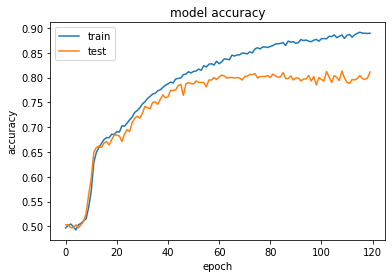

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [68]:
import pandas as pd
loss = pd.DataFrame(model.history.history)

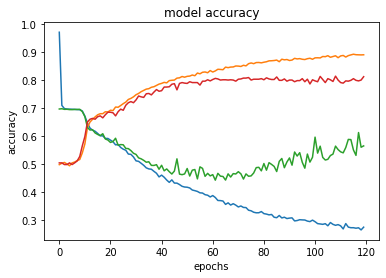

In [75]:
plt.plot(loss)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('model accuracy');

# evaluating on givin test set

In [79]:
model.load_weights(filename)
pred_result = model.predict((input_test , queries_test))

In [80]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [81]:
story = ' '.join(word for word in test_data[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [84]:
query = ' '.join(word for word in test_data[0][1])
query

'Is John in the kitchen ?'

In [86]:
print('true test anwer from the data is:' , test_data[0][2])

true test anwer from the data is: no


In [87]:
# generate prediction from model
val_max = np.argmax(pred_result[0])

for key , val in tokenizer.word_index.items():
    if val == val_max:
        k = key
        
print('the predicted answer is :' , k)
print('the probability of certaintity was:' , pred_result[0][val_max])

the predicted answer is : no
the probability of certaintity was: 0.9985582


# write your own stories and questions

In [88]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [110]:
my_story = 'Daniel travelled to hallway . Daniel grabbed sandra in the office .'
my_story.split()

['Daniel',
 'travelled',
 'to',
 'hallway',
 '.',
 'Daniel',
 'grabbed',
 'sandra',
 'in',
 'the',
 'office',
 '.']

In [111]:
my_question = 'Is sandra in hallway ?'
my_question.split()

['Is', 'sandra', 'in', 'hallway', '?']

In [112]:
mydata = [(my_story.split() , my_question.split() , 'no')]

In [113]:
my_story , my_ques , my_ans = vectorize_stories(mydata)

In [114]:
pred_result = model.predict(([my_story , my_ques]))

In [115]:
# genrate prediction from the model
val_max = np.argmax(pred_result[0])

for key , val in tokenizer.word_index.items():
    if val == val_max:
        k = key
        
print('the predicted answer is : ' , k)
print('probability of certainty is: ' , pred_result[0][val_max])

the predicted answer is :  yes
probability of certainty is:  0.8669238


# Thanks